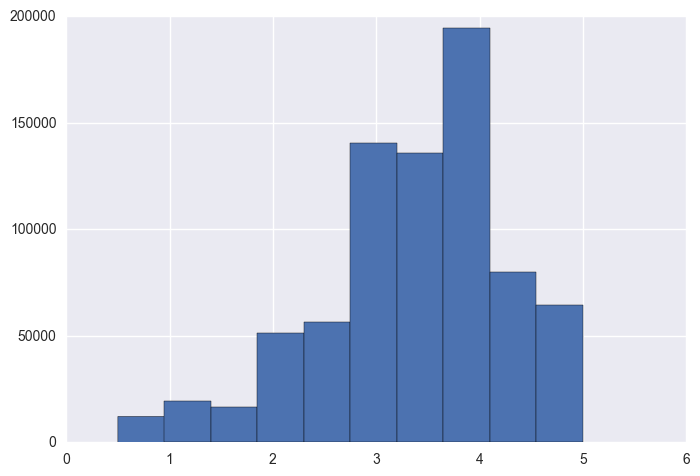

In [1]:
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas
 
ur = pandas.read_csv('movie_training_data/user_ratedmovies_train.dat','\t')
 
plt.hist( ur['rating'])

plt.show()
# create a test/train split
 
all_inds = np.random.permutation( range(0,len(ur)) )
test_inds = all_inds[0:85000]
train_inds = all_inds[85000:-1]
 
ur_test = ur.iloc[ test_inds ]
ur_train = ur.iloc[ train_inds ]


This graph shows us that our average graph is about a 3.5 and it's heavily skewed to the left.

In [2]:
print ur_train[:10]

        Unnamed: 0  userID  movieID  rating  date_day  date_month  date_year  \
268434       94905    8114     1291     3.0        19           1       1999   
191090      706115   58693    53000     4.0        22          12       2008   
563996       33728    3104     1220     3.5        26           3       2008   
104847      395453   31523     1394     3.5        11           4       2006   
324720      617340   50543    55442     4.0        11           2       2008   
723364      240390   19982     4608     3.5         4          10       2005   
377256        5485     783     7366     3.5        26           1       2007   
115887      497401   39689     3946     4.0        29           9       2008   
162217      752235   62847       50     3.5         4           1       2009   
518410      787309   65881     3388     2.5         1           4       2004   

        date_hour  date_minute  date_second  
268434         16           21           44  
191090          0          

## Plotting Months vs Rating

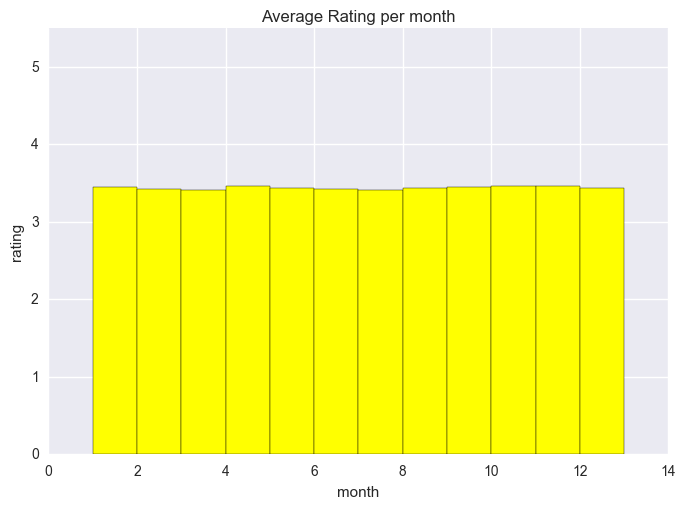

In [23]:
import matplotlib.pyplot as plt
 
# y = sum(ur_train['rating'])/(len(ur_train['rating'])*5)
months = np.arange(1,13)
avgmonth = []
for month in months:
    formallist = ur_train.loc[ur_train['date_month'] == month]
    avgmonth.append(formallist['rating'].mean())

plt.bar(months, avgmonth, 1,  color = "yellow")
plt.ylim(0,5.5)
plt.title('Average Rating per month')
plt.ylabel('rating')
plt.xlabel('month')
plt.show()


From this we can see that the average rating per month doesn't change anything significantly


## Plotting user ID by average Rating

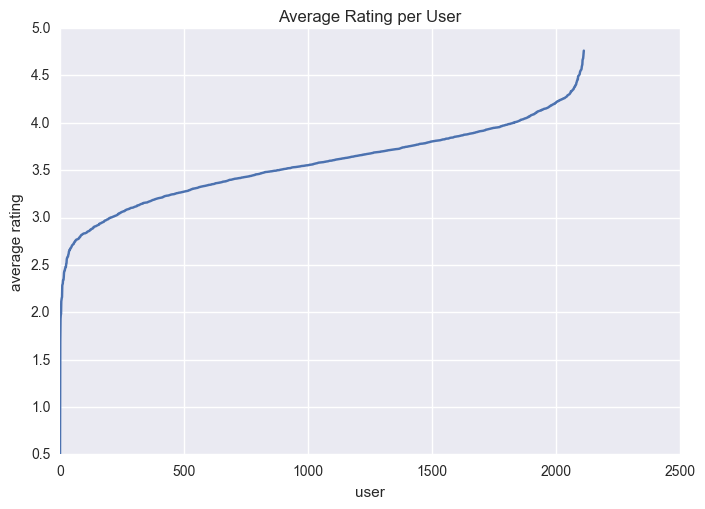

In [49]:
import matplotlib.pyplot as plt

users = ur_train['userID'].unique()
usermeans = []
for user in users:
    formallist = ur_train.loc[ur_train['userID'] == user]
    usermeans.append(formallist['rating'].mean())

usermeans.sort()
users = np.arange(len(users))
plt.plot(users, usermeans)
plt.title('Average Rating per User')
plt.ylabel('average rating')
plt.xlabel('user')
plt.show()

We can see that the average user gives ratings about 3-4 and your extreme users give ratings about 5 or 0 (on a bell curve the 5 and 0 would be statistically significant)


## Number of Movies per Rating

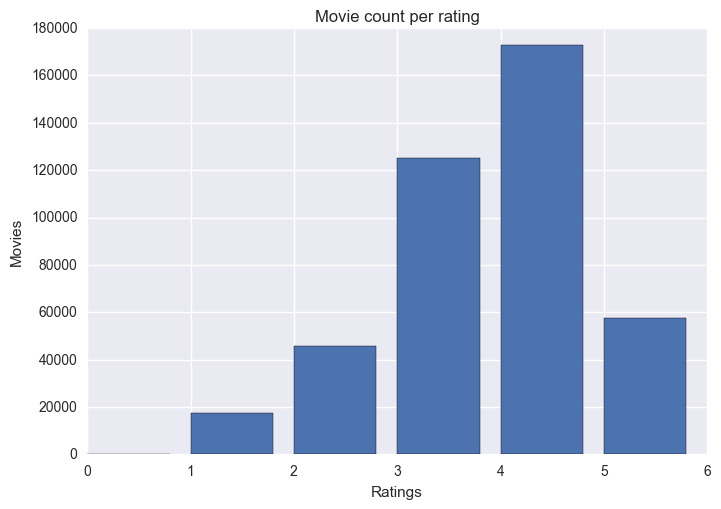

In [37]:
ratings  = np.arange(0,6)
movies = []
for rating in ratings:
    formallist = ur_train.loc[ur_train['rating'] == rating]
    movies.append(len(formallist['movieID']))


plt.bar(ratings, movies)
plt.title('Movie count per rating')
plt.ylabel('Movies')
plt.xlabel('Ratings')
plt.show()

From this we can see that most of the movies are rated 3-4. There are some movies rated very badly but most are about average.

Average Rating per Movie

In [88]:
# uniquemovies = ur_train['movieID'].unique()
# sort = np.sort(uniquemovies)
# moviemeans = []
# for movie in uniquemovies:
#     formallist = ur_train.loc[ur_train['movieID'] == movie]
#     moviemeans.append(formallist['rating'].mean())

# moviemeans = list.sort(moviemeans)
# plt.plot(uniquemovies, moviemeans)
# plt.title('Average Rating per Movie')
# plt.ylabel('movies')
# plt.xlabel('ratings')
# plt.show()

## Number of ratings per year

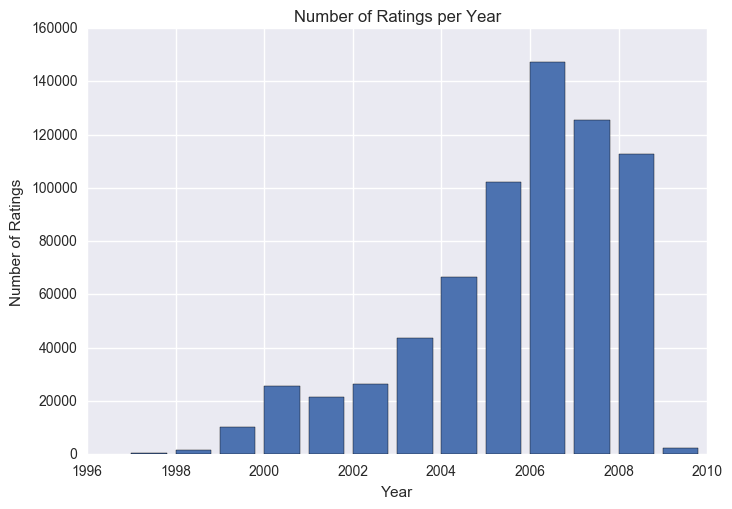

In [35]:
years = ur_train['date_year'].unique()
years = np.sort(years)
yearmeans = []
for year in years:
    formallist = ur_train.loc[ur_train['date_year'] == year]
    yearmeans.append(len(formallist['rating']))

plt.bar(years, yearmeans)
plt.title('Number of Ratings per Year')
plt.ylabel('Number of Ratings')
plt.xlabel('Year')
plt.show()

This shows us that the number of movie ratings went up every year and this study stopped in 2010

## Average Ratings per Year

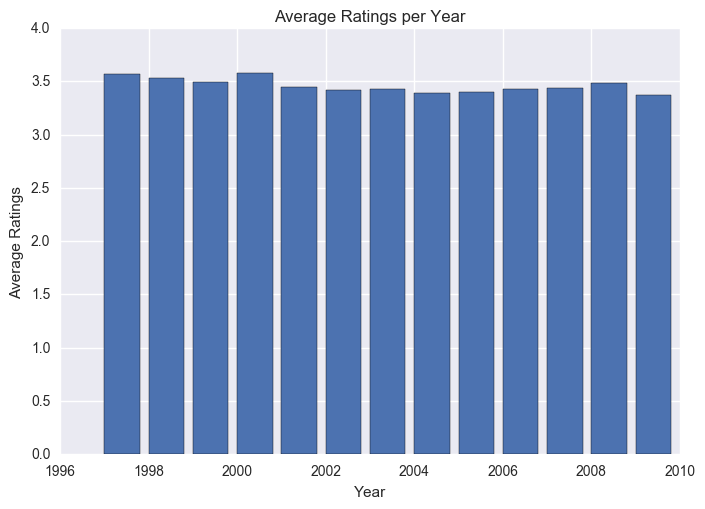

In [43]:
yearavg = []
for year in years:
    formallist = ur_train.loc[ur_train['date_year'] == year]
    yearavg.append((formallist['rating']).mean())

plt.bar(years, yearavg)
plt.title('Average Ratings per Year')
plt.ylabel('Average Ratings')
plt.xlabel('Year')
plt.show()

However, we can see that the year doesn't really have an effect on the ratings given. People give a minimally lower rating but it isn't significant

# Read in the Prediction Data

In [101]:
predict = pandas.read_csv('predictions.dat','\t')

# Bad Assumption
* A user has the same opinion of all movies. 
* Use the average rating for each user to come up with their rating for the next val

In [107]:
import math

tusers = ur_test['userID'].unique()
#set average user ratings
aur = {}
for user in tusers:
    #find the avg rating fore each user
    formallist = ur_train.loc[ur_train['userID'] == user]
    ratingmean = formallist['rating'].mean()
    if (formallist['rating'].shape[0] == 0):
        ratingmean = 3.5
    addingval = 0
    # round to the nearest .5
    if (ratingmean%1 >= .5 ):
        addingval = .5
    aur[user] = round(ratingmean) + addingval

sse = 0
predictions = []
for user in tusers:
    # get predicted rating for user
    avgrating = aur[user]
    #get all the unique movies for that user in the test cases
    formallist = ur_test.loc[ur_test['userID'] == user]
    movielist = formallist['movieID']
    #for every movie predict something
    for movie in movielist:
        movie_data = formallist.loc[formallist['movieID'] == movie]
        true_rating = movie_data.iloc[0]['rating']
        predictions.append([user, movie , avgrating, true_rating, true_testid] )
        sse += (avgrating-true_rating)**2

#print predictions
length = ur_test.shape[0]
rmse = math.sqrt(1.0/length * sse)
print "RMSE = ", rmse

RMSE =  1.09991978317


# Bad assumption #2
* Calculate the Average movie rating
* Assume each movie is rated the same by each user, or at least similarly


In [108]:
tmovies = ur_test['movieID'].unique()

#set average user ratings for the movies
amr = {}
for movie in tmovies:
    #find the avg rating fore each user
    formallist = ur_train.loc[ur_train['movieID'] == movie]
    ratingmean = formallist['rating'].mean()
    if (formallist['rating'].shape[0] == 0):
        ratingmean = 3.5
    addingval = 0
    # round to the nearest .5
    if (ratingmean%1 >= .5 ):
        addingval = .5
    amr[movie] = round(ratingmean) + addingval

sse2 = 0
predictions2 = []
for movie in tmovies:
    # get predicted rating for user
    avgrating = amr[movie]
    #get all the unique movies for that user in the test cases
    formallist = ur_test.loc[ur_test['movieID'] == movie]
    userlist = formallist['userID']
    #for every movie predict something
    for user in userlist:
        user_data = formallist.loc[formallist['userID'] == user]
        true_rating = user_data.iloc[0]['rating']
        predictions2.append([user, movie , avgrating, true_rating] )
        sse2 += (avgrating-true_rating)**2

#print predictions
rmse2 = math.sqrt(1.0/length * sse2)
print "RMSE = ", rmse2

RMSE =  1.06739512503


# Iffy approach #1
* take the average of the two bad approaches. 
* use both user data and movie data to predict the average score

In [86]:
sse3 = 0
predictions3 = []
for movie in tmovies:
    #get all the unique movies for that user in the test cases
    formallist = ur_test.loc[ur_test['movieID'] == movie]
    userlist = formallist['userID']
    #for every movie predict something
    for user in userlist:
        #get avg rating based on movie and user
        avgrating = (amr[movie] + aur[user])/2
        user_data = formallist.loc[formallist['userID'] == user]
        true_rating = user_data.iloc[0]['rating']
        predictions3.append([user, movie , avgrating, true_rating] )
        sse3 += (avgrating-true_rating)**2

In [87]:
#print predictions
rmse3 = math.sqrt(1.0/length * sse3)
print "RMSE = ", rmse3

RMSE =  0.962749585669


In [110]:
avgrating = ur['rating'].mean()
print avgrating
# I'm going to just round this to 3.5 by hand...

3.43810002102


In [117]:
predictions4 = []
testid = np.arange(85000)
for test in testid:
    #get all the unique movies for that user in the test cases
    formallist = predict.loc[predict['testID'] == test]
    user = formallist.iloc[0]['userID']
    movie = formallist.iloc[0]['movieID']
    avguser = 3.5
    avgmovie = 3.5
    if user in aur: 
        avguser = aur[user]
    if movie in amr:
        avgmovie = amr[movie]
    #get avg rating based on movie and user
    avgrating = (avguser + avgmovie)/2
    addingval = 0
    # round to the nearest .5
    if (avgrating%1 >= .5 ):
        addingval = .5
    predictions4.append([test, round(avgrating+.5)+addingval] )
    

# Writeup
1. What does it include? 
    * UserID, movieID, rating, day, month, year, hour, min, sec
2. What patterns do you see?
    * I found patters in the number of ratings per year, the average rating per user, and the average rating is about 3.5
3. Any visualizations about the data you deem relevant
    * Included at the beginning



A clear, technical description of your approach. This section should include:
1. Background on the approach
    * Did a first approach that based on the individual user and their habits, then a second approach that was content based. They were both bad, so I took the average of the two as my approach.
2. Description of the model you use
    * For every user we got the average of each of their ratings, then took the average of each of the movies' ratings. Then I took average of the two and made that my prediction. This is becasue I am assuming that the user's habits and the average score of the movie are both good indicators of the actual value. Taking the average of the two should give a good indication of the actual score of the user.
3. Description of the inference / training algorithm you use
    * An average of multiple averages across the training data set
4. Description of how you partitioned your data into a test/training split
    * Gave it a number (given by dr wingate = 85000) to separate the first ~11% of the data points as test data from the rest - our training data- in a random manner. Then used the training data to create averages to get our differences for the full set
5. An analysis of how your approach worked on the dataset
    * The RMSE = 0.962749585669 which means it was on average about 1 point off of the actual rating. 
6. What was your final RMSE on your private test/training split?
    * On the Iffy method, I got RMSE =  0.962749585669
7. Did you overfit? How do you know?
    * It not overfit because we're fully relying on the data and creating assumptions based on the data. I know becasue it doesn't fit our own data perfectly. It's still +-1 from the original data. 
8. Was your first algorithm the one you ultimately used for your submission? Why did you (or didn't you) iterate your design?
    * No because it wasn't super accurate. I wanted the RMSE to be below 1.0 so I kept iterating using assumptions I had made about how useful the training data was and the graphs and how related the data was to each other to create my predictions.


In [118]:
sfile = open( 'predictions.csv', 'wb' )
sfile.write( '"TestID","Predicted Rating"\n' )
for index in range( len(predictions4) ):
    sfile.write( '%d,%.2f\n' % ( predictions4[index][0],predictions4[index][1]  ) )  
sfile.close()